# Titel

Gruppe: Gaia Capoferri, Dana Schnekenburger, Katarina Djuric

Fragen
- Welche Länder hatten in den letzten 50 Jahren die grösste Zunahme der Schuljahre?
- Was sind die Gründe dafür?

Quellen
- https://ourworldindata.org/grapher/mean-years-of-schooling-long-run?tab=chart

## 1. Daten beschaffen und laden

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# loading the data
df_orig = pd.read_csv('mean-years-of-schooling-long-run/mean-years-of-schooling-long-run.csv', skiprows=1,
                 names=['Entity','Code','Year','Combined-average years of education for 15-64 years male and female youth and adults'])
df_orig.head() 

,Entity,Code,Year,Combined-average years of education for 15-64 years male and female youth and adults
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01


## 2. Daten vorbereiten
- Die Roh-Daten sind bereits im Long-Format
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Region, die Zeilen sind die verschiedenen Jahre - in absteigender Reihenfolge von 5 Jahren.

In [5]:
df_pivot = df_orig.pivot(index='Entity', columns='Year', values='Combined-average years of education for 15-64 years male and female youth and adults')
df_pivot.head()

Year,1870,1875,1880,1885,1890,1895,1900,1905,1910,1915,...,1995,2000,2005,2010,2015,2020,2025,2030,2035,2040
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.01000,0.01000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.020000,...,2.400000,3.030000,3.320000,3.930000,4.810000,5.690000,6.26000,6.840000,7.380000,7.920000
Africa,0.05829,0.06893,0.084427,0.103117,0.120366,0.130437,0.148879,0.183318,0.233323,0.323424,...,4.708579,5.012495,5.446501,5.890455,6.195438,6.681866,7.18392,7.733528,8.256504,8.776776
Albania,0.02000,0.03000,0.030000,0.040000,0.050000,0.060000,0.080000,0.100000,0.150000,0.240000,...,8.540000,9.930000,10.240000,10.440000,9.990000,10.320000,10.58000,10.830000,11.100000,11.390000
Algeria,0.10000,0.13000,0.160000,0.200000,0.230000,0.270000,0.390000,0.510000,0.600000,0.580000,...,5.760000,6.060000,6.430000,7.000000,7.550000,8.180000,8.77000,9.370000,10.030000,10.590000
Argentina,0.39000,0.49000,0.590000,0.650000,0.700000,0.830000,0.970000,1.450000,1.810000,2.350000,...,8.910000,9.080000,9.570000,9.710000,9.590000,9.860000,10.13000,10.390000,10.640000,10.870000


## 3. Statistik der Roh-Daten (Analyse in Long-Format)

über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Entity* enthält 146 verschieden Entity 
- Die Spalte *Codes* enthält 146 verschiedene Codes
- Die Daten zwischen 1870 und 2040 sind vorhanden. Wir untersuchen nur von 1970 bis 2020
- Die Combined-average years of education for 15-64 years male and female youth and adults streut zwischen 1 und 1374

In [6]:
df_orig.dtypes

Entity                                                                                   object
Code                                                                                     object
Year                                                                                      int64
Combined-average years of education for 15-64 years male and female youth and adults    float64
dtype: object

### 3.1 Analyse Entity

In [7]:
drop_entities = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America", "World"]
drop_years = [1870, 1875, 1880, 1885, 1890, 1895, 1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 2025, 2030, 2035, 2040]
df_analyse = df_orig[~df_orig["Entity"].isin(drop_entities)]
df_analyse = df_analyse[~df_analyse["Year"].isin(drop_years)]

In [8]:
print('Anzahl verschiedener Entities: ', len(df_analyse['Code'].unique()))

Anzahl verschiedener Entities:  146


In [9]:
# Anzahl Datenpunkte pro Entity
df_analyse['Entity'].value_counts()

Entity
Afghanistan                 11
Italy                       11
Peru                        11
Paraguay                    11
Panama                      11
                            ..
Slovenia                     2
Central African Republic     2
Estonia                      2
Lithuania                    2
Israel                       2
Name: count, Length: 146, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Entity'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

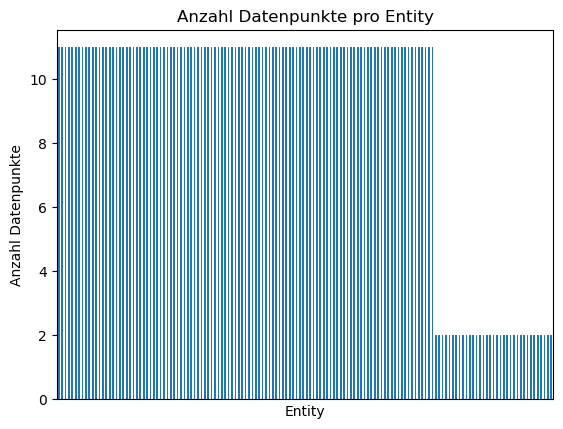

In [10]:
df_analyse['Entity'].value_counts().plot(kind='bar',
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Entity')

### 3.2 Analyse Year

In [11]:
print('Anzahl verschiedener Years: ', len(df_analyse['Year'].unique()))

Anzahl verschiedener Years:  11


In [12]:
# Anzahl Datenpunkte pro Year
df_analyse['Year'].value_counts().sort_index()

Year
1970    111
1975    111
1980    111
1985    111
1990    111
1995    111
2000    111
2005    111
2010    111
2015    146
2020    146
Name: count, dtype: int64

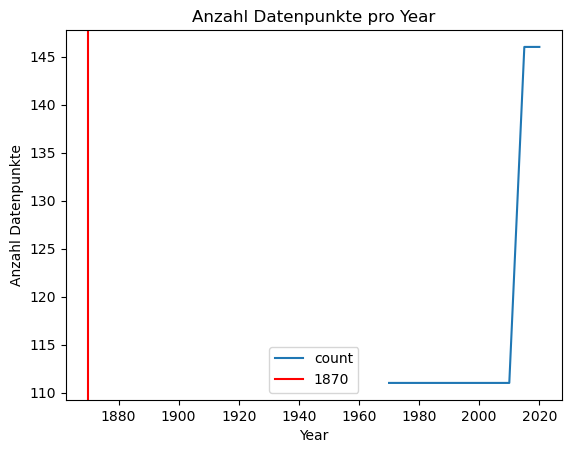

In [13]:
g = df_analyse['Year'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Year');
g.axvline(x=1870, color='red', label='1870')
g.legend()

### 3.3 Analyse Combined-average years of education for 15-64 years male and female youth and adults

In [14]:
df_analyse.describe()

,Year,Combined-average years of education for 15-64 years male and female youth and adults
count,1291.000000,1291.000000
mean,1996.219985,7.175864
std,16.215686,3.259836
min,1970.000000,0.070000
25%,1980.000000,4.640000
50%,1995.000000,7.370000
75%,2010.000000,9.865000
max,2020.000000,13.740000


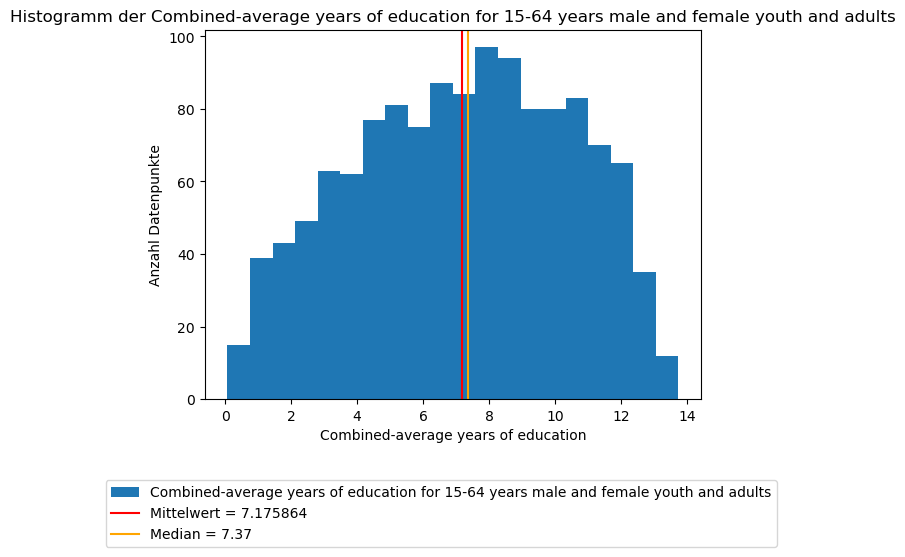

In [27]:
g = df_analyse['Combined-average years of education for 15-64 years male and female youth and adults'].plot(kind='hist', bins=20, title='Histogramm der Combined-average years of education for 15-64 years male and female youth and adults',
                                                                                                    xlabel='Combined-average years of education', ylabel='Anzahl Datenpunkte')
mean = df_analyse['Combined-average years of education for 15-64 years male and female youth and adults'].mean()
g.axvline(x=df_analyse['Combined-average years of education for 15-64 years male and female youth and adults'].mean(), color='red',label=f'Mittelwert = {mean:2f}')

median = df_analyse['Combined-average years of education for 15-64 years male and female youth and adults'].median()
g.axvline(x=df_analyse['Combined-average years of education for 15-64 years male and female youth and adults'].median(), color='orange',label=  f'Median = {median:.2f}')

g.legend(loc=[-0.2,-0.4])

## 4. Analyse

### Vorgehen

### Beobachtungen
- 

### Berechnungen

In [54]:
dr_pivot = df_analyse.pivot(index='Entity', columns='Year', values='Combined-average years of education for 15-64 years male and female youth and adults')
dr_pivot.head()

Year,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Entity,,,,,,,,,,,
Afghanistan,0.72,0.97,1.29,1.73,2.06,2.40,3.03,3.32,3.93,4.81,5.69
Albania,4.63,5.77,6.95,7.93,8.61,8.54,9.93,10.24,10.44,9.99,10.32
Algeria,1.69,2.26,3.00,4.28,5.05,5.76,6.06,6.43,7.00,7.55,8.18
Argentina,6.48,7.03,7.51,8.09,8.67,8.91,9.08,9.57,9.71,9.59,9.86
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.45,10.54


In [55]:
dr_pivot = df_analyse.pivot(index='Entity', columns='Year', values='Combined-average years of education for 15-64 years male and female youth and adults')
dr_pivot.tail()

Year,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Entity,,,,,,,,,,,
Venezuela,3.49,4.51,5.47,5.33,5.26,6.11,7.01,7.80,8.78,9.02,9.33
Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.99,8.35
Yemen,0.07,0.08,0.25,0.64,1.25,1.77,2.45,3.12,3.84,4.64,5.56
Zambia,3.12,3.81,4.36,4.77,5.02,6.03,6.35,6.59,7.40,7.90,8.37
Zimbabwe,3.22,3.54,4.03,4.84,5.97,6.85,7.26,7.65,7.86,8.03,8.32


In [47]:
diffs = dr_pivot[2020]-dr_pivot[2010]
diffs = diffs.sort_values().dropna()
diffs

Entity
Belize        -0.57
Guyana        -0.48
Russia        -0.42
Sri Lanka     -0.34
Bulgaria      -0.32
               ... 
Yemen          1.72
Nepal          1.75
Afghanistan    1.76
Iceland        2.01
Mozambique     2.19
Length: 111, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen der "Combined-average years of education for 15-64 years male and female youth and adults" 2010-2020'}, ylabel='Entity'>

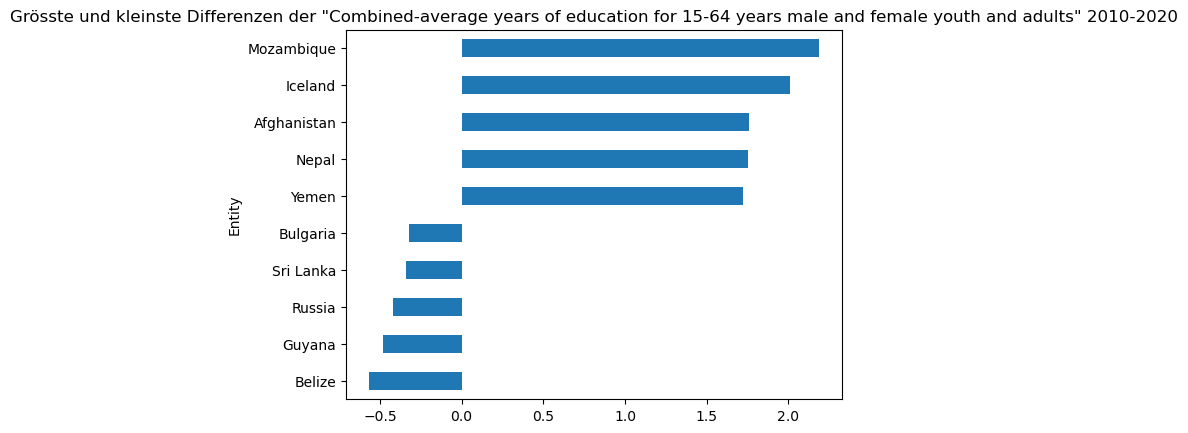

In [60]:
diff_sel = (diffs < -0.31) | (diffs > 1.7)
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen der "Combined-average years of education for 15-64 years male and female youth and adults" 2010-2020')

In [64]:
Entity_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Entity_liste)

['Belize', 'Guyana', 'Russia', 'Sri Lanka', 'Bulgaria', 'Yemen', 'Nepal', 'Afghanistan', 'Iceland', 'Mozambique']
